# The Sparks Foundation

### Data Science and Business Analytics Internship

Task #1 - Predict the percentage of an student based on the no. of study hours.

Author - Tanvi Bajad (E-mail Id - tanvibajad101@gmail.com)

The dataset for this task can be found at http://bit.ly/w-data

In [27]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [28]:
# importing the required dataset 
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\student_scores.csv')

### Data Exploration:

In [29]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [31]:
# checking any null values in the Dataset
df.isna().any()

Hours     False
Scores    False
dtype: bool

### Data Visualizations: 

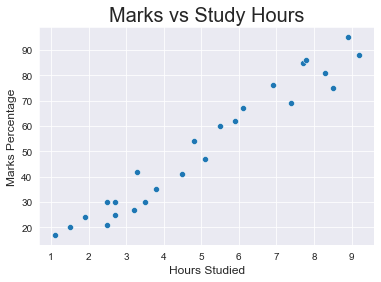

In [32]:
sns.set_style('darkgrid')
sns.scatterplot(y = df['Scores'], x = df['Hours'])
plt.title('Marks vs Study Hours', size = 20)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

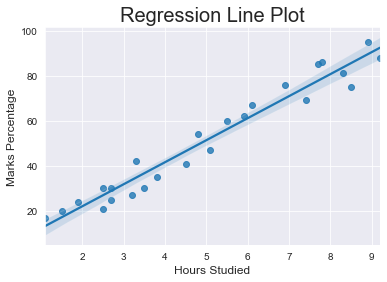

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [33]:
sns.regplot(x = df['Hours'], y = df['Scores'])
plt.title('Regression Line Plot', size = 20)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()
print(df.corr())

### Creating and Training the Prediction Model 

In [34]:
# defining x and y from the dataset
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# spliting the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
model = LinearRegression()
model.fit(X_train, Y_train)
print("Model has been trained.")

Model has been trained.


### Prediction and Evaluation:

In [36]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Scores': [j for j in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [37]:
compare_scores = pd.DataFrame({'Actual Scores': Y_test, 'Predicted Scores': y_pred})
compare_scores

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


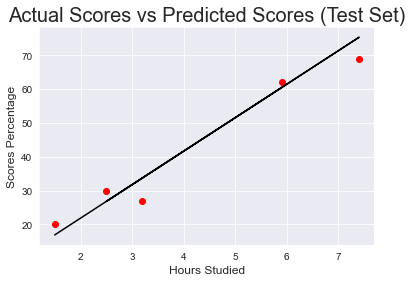

In [38]:
plt.scatter(x = X_test, y = Y_test, color='red')
plt.plot(X_test, y_pred, color = 'black')
plt.title('Actual Scores vs Predicted Scores (Test Set)', size = 20)
plt.ylabel('Scores Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

In [39]:
# Calculating the accuracy of the model
print('Mean absolute error:', mean_absolute_error(Y_test, y_pred))

Mean absolute error: 4.183859899002975


### Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [40]:
hours = [9.25]
predicted_value = model.predict([hours])
print("Score = {}".format(round(predicted_value[0],2)))

Score = 93.69


So if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.